# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023



## 1. Úvod

V projektu budete pracovat se biomedicínskými signály a to konkrétně se signálem elektrokardiogramu EKG. Vyzkoušíte si filtraci tohoto druhu signálu, abyste dostali krásné EKG křivky, které můžete vidět ve filmech. Dále si zkusíte vybudovat jednoduchý, ale účinný detektor QRS a ti, kteří se vrhnou i na bonusový úkol, si zkusí odhalit srdeční patologii. K dispozici dostanete každý 3 nahrávky jednokanálového EKG signálu, jeden zdravý a dva s různými patologiemi.

Projekt je nejlépe možno řešit v Python-u a to přímo v dodaném Python notebooku, který si můžete zkopírovat do vlastního Google Colabu. Projekt je také možno řešit v Matlab-u, Octave, Julii, jazyce C, Java nebo v libovolném jiném programovacím či skriptovacím jazyce. Je možné použít libovolné knihovny. Projekt se nezaměřuje na “krásu programování”, není tedy nutné mít vše úhledně zabalené do okomentovaných funkcí (samozřejmě se ale okomentovaný kód lépe opravuje a to hlavně v případě podivných výsledků), ošetřené všechny chybové stavy, atd. Důležitý je výsledek.

**Vaši práci odevzdáváte vyexportovanou do dvou souborů: (1) do PDF souboru login.pdf, (2) do Python notebooku login.ipynb. PDF musí obsahovat výsledky prokazatelně vytvořené Vaším kódem.** V případě řešení projektu v jiném jazyce nebo prostředí než v dodaném Python notebooku, je prvním souborem protokol v PDF, druhý soubor je archiv s Vaším kódem. Ten musí být spustitelný na standardní fakultní distribuci Windows nebo Linuxu.

## 3. Vstup
Pro řešení projektu má každý student/ka k disposici osobní soubor se  zdravým signálem (sinusovým rytmem): ***login.wav***, kde login je váš xlogin popřípadě VUT číslo (pro studenty FSI). Dále jsou k disposici  ještě další dva signály: ***FIS.wav*** a ***KES.wav***. První signál obsahuje fibrilaci a druhý komorovou extrasystolu. Tyhle dva soubory jsou pro všechny společné a využijete je při řešení bonusového úkolu.

In [ ]:
#Načtení Vašeho signálu - xlogin99 nahraďte Vaším loginem
import soundfile as sf

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xblaze38.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav

x, fs = sf.read("xblaze38.wav")


--2023-12-17 20:39:26--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xblaze38.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘xblaze38.wav.6’

xblaze38.wav.6      100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-17 20:39:28 (87.6 MB/s) - ‘xblaze38.wav.6’ saved [10044/10044]

--2023-12-17 20:39:28--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘FIB.wav.7’

FIB.wav.7           100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-

## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

Nezapomeňte na popisy os u jednotlivých grafů.

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

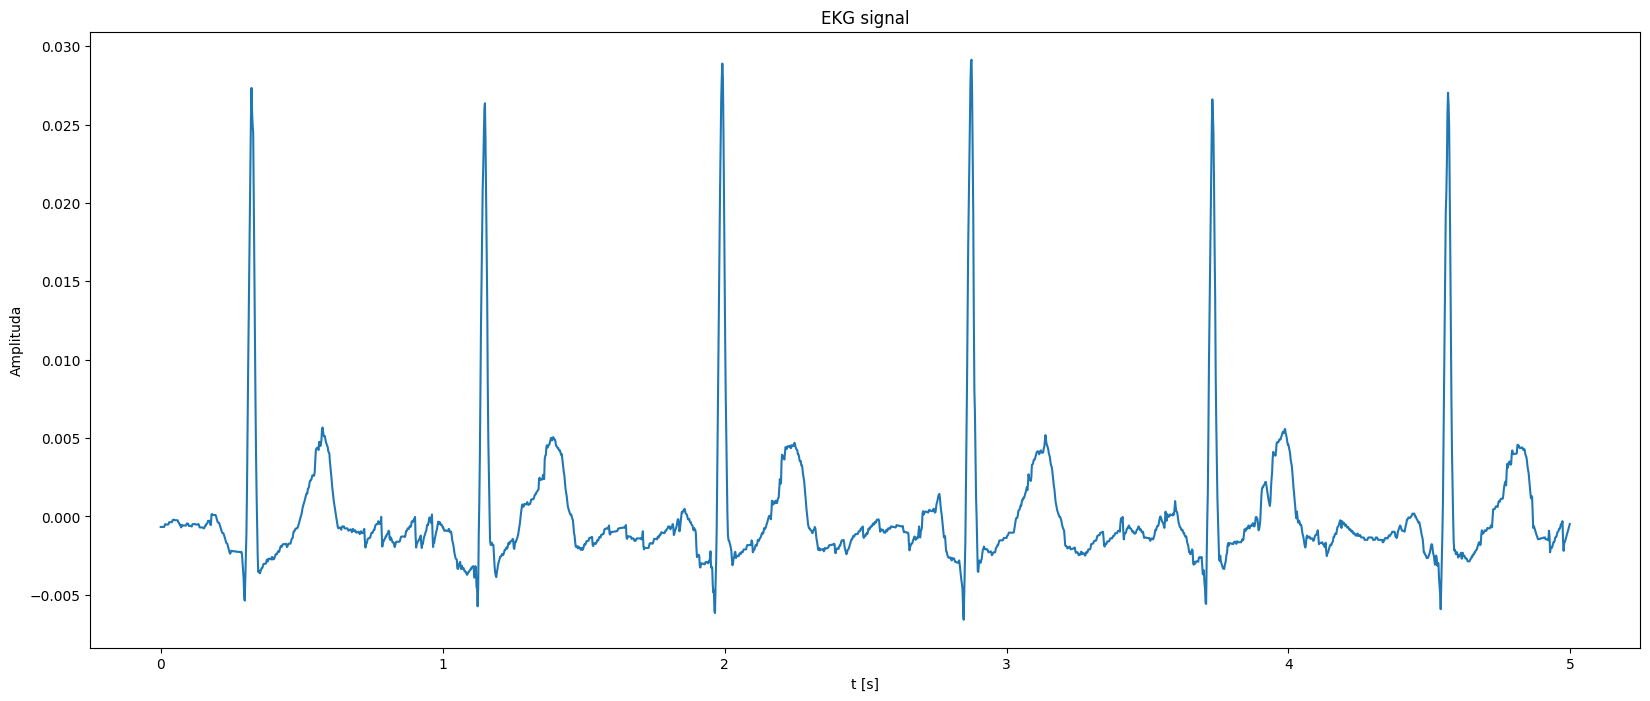

In [ ]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

x, fs = sf.read("xblaze38.wav")

time = np.arange(0, 5, 1 / fs) # 0 je pocatecni cas, 5 je konecny cas

plt.figure(figsize = (20, 8))
plt.plot(time, x[0 : 5 * fs])

plt.title("EKG signal")
plt.xlabel("t [s]")
plt.ylabel("Amplituda")
plt.show()


b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

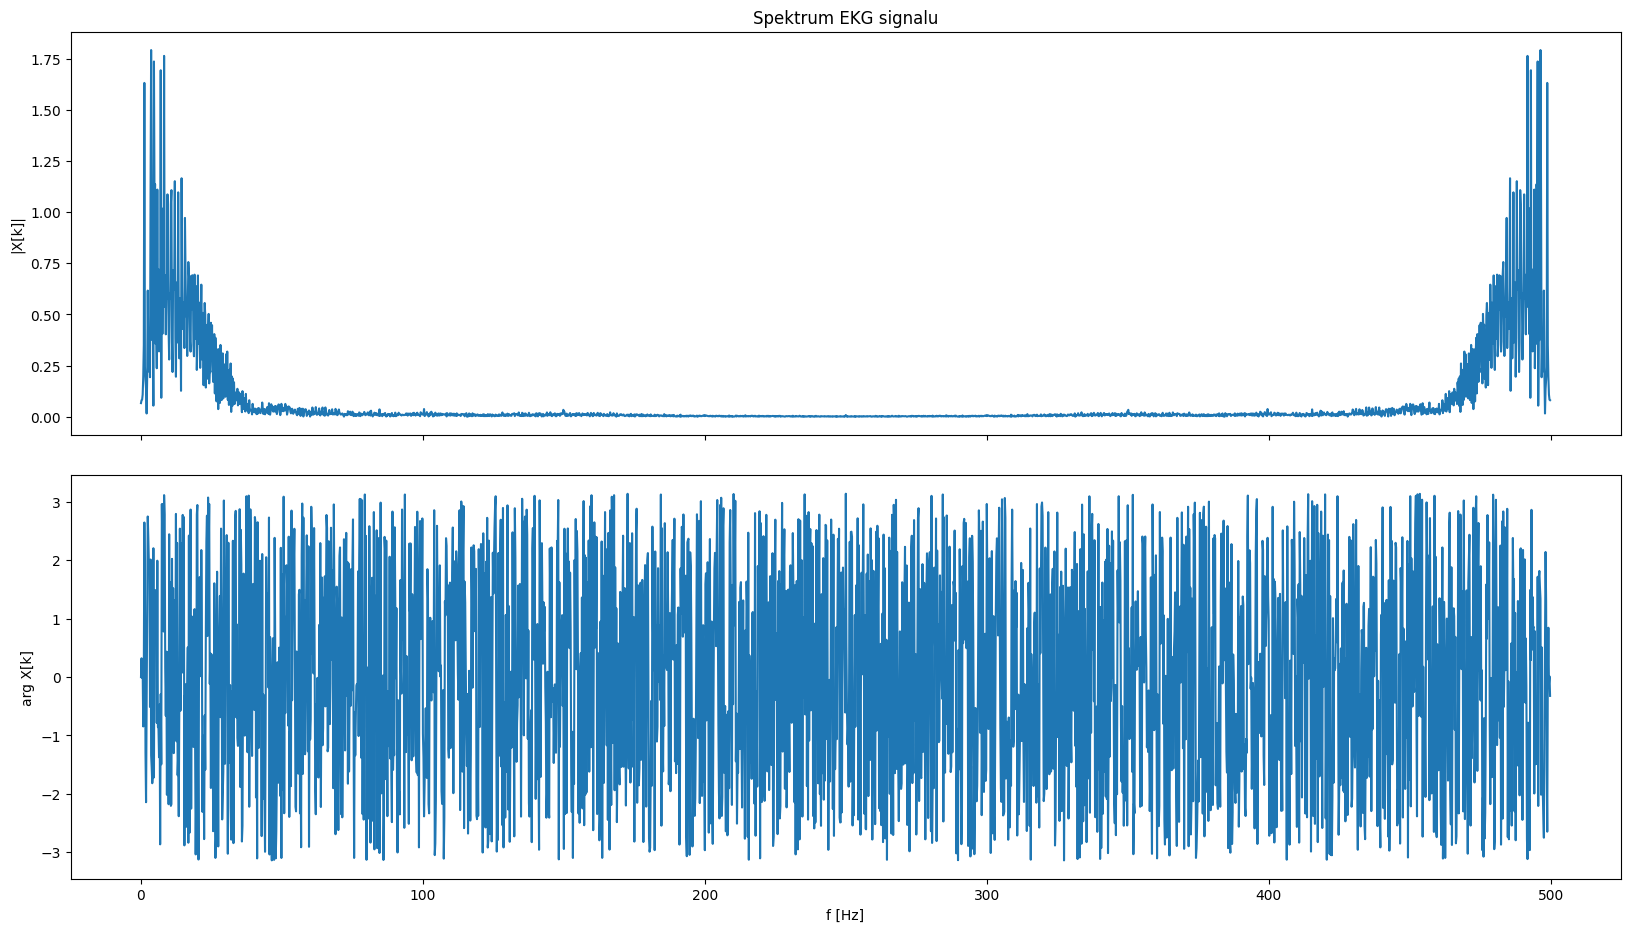

In [ ]:
our_signal = x[0 : 5 * fs]
signal_size = len(our_signal)

X = np.fft.fft(our_signal)
kall = np.arange(0, signal_size)
Xmag = np.abs(X[kall])
Xphase = np.angle(X[kall])
frequency = kall / signal_size * fs

_, ax = plt.subplots(2, 1, figsize = (20, 11), sharex = 1)
plt.subplots_adjust(hspace = 0.1)

ax[0].plot(frequency, Xmag)
ax[0].set_title("Spektrum EKG signalu")
ax[0].set_ylabel("|X[k]|")
ax[1].plot(frequency, Xphase)
ax[1].set_xlabel("f [Hz]")
ax[1].set_ylabel("arg X[k]")

plt.show()


 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

Rušení je způsobeno magnetickým polem z elektrického napájení. V tomto případě se toto řušení téměř ani neprojevilo.

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

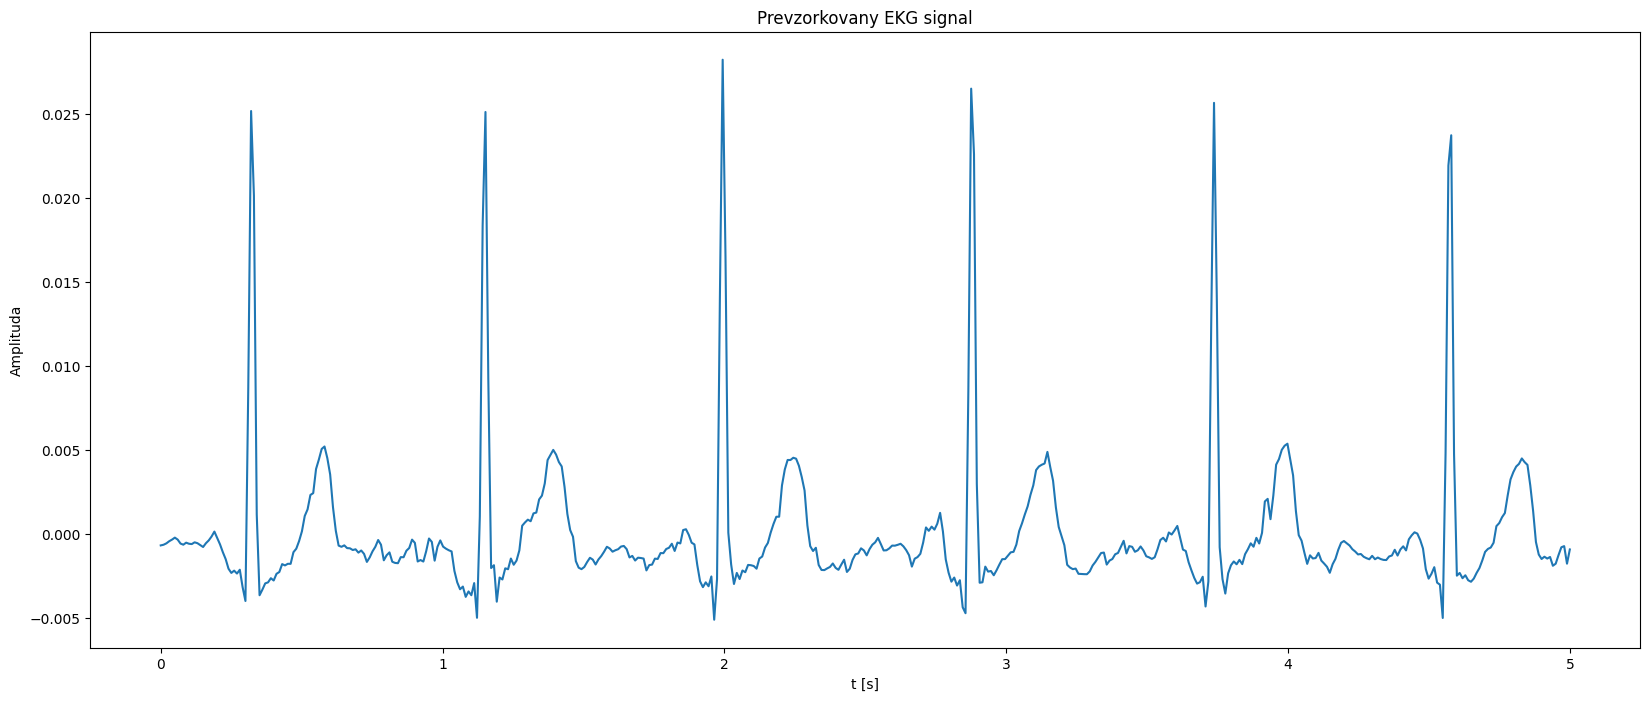

In [ ]:
from scipy import signal


new_fs = 100

new_signal = signal.resample(our_signal, int(signal_size * new_fs / fs))
new_time = np.linspace(0, 5, len(new_signal))

plt.figure(figsize=(20, 8))
plt.plot(new_time, new_signal)
plt.title("Prevzorkovany EKG signal")
plt.xlabel("t [s]")
plt.ylabel("Amplituda")
plt.show()


b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

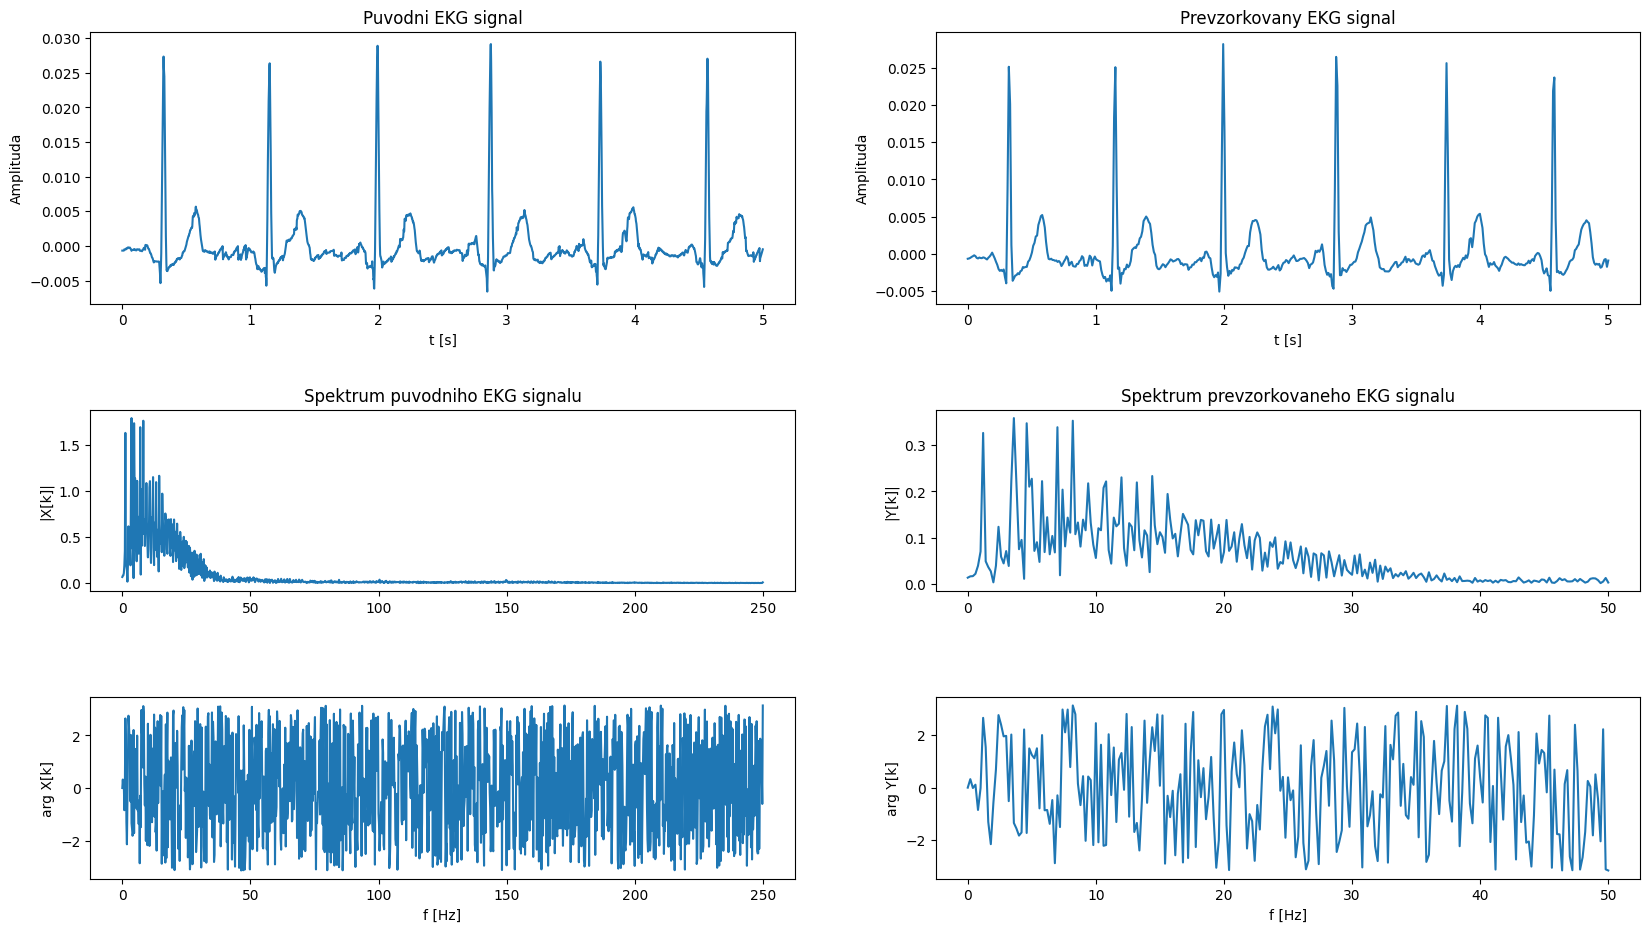

In [ ]:
_, ax2 = plt.subplots(3, 2, figsize = (20, 11), gridspec_kw={'height_ratios': [3, 2, 2]})
plt.subplots_adjust(hspace = 0.5)

ax2[0,0].plot(time, our_signal)
ax2[0,0].set_title("Puvodni EKG signal")
ax2[0,0].set_xlabel("t [s]")
ax2[0,0].set_ylabel("Amplituda")

ax2[0,1].plot(new_time, new_signal)
ax2[0,1].set_title("Prevzorkovany EKG signal")
ax2[0,1].set_xlabel("t [s]")
ax2[0,1].set_ylabel("Amplituda")

kall = np.arange(0, int(signal_size / 2) + 1)
Xmag = np.abs(X[kall])
Xphase = np.angle(X[kall])
frequency = kall / signal_size * fs

ax2[1,0].plot(frequency, Xmag)
ax2[1,0].set_title("Spektrum puvodniho EKG signalu")
ax2[1,0].set_ylabel("|X[k]|")
ax2[2,0].plot(frequency, Xphase)
ax2[2,0].set_xlabel("f [Hz]")
ax2[2,0].set_ylabel("arg X[k]")

new_signal_size = len(new_signal)
Y = np.fft.fft(new_signal)
kall_new = np.arange(0, int(new_signal_size / 2) + 1)
Ymag = np.abs(Y[kall_new])
Yphase = np.angle(Y[kall_new])
frequency_new = kall_new / new_signal_size * new_fs

ax2[1,1].plot(frequency_new, Ymag)
ax2[1,1].set_title("Spektrum prevzorkovaneho EKG signalu")
ax2[1,1].set_ylabel("|Y[k]|")
ax2[2,1].plot(frequency_new, Yphase)
ax2[2,1].set_xlabel("f [Hz]")
ax2[2,1].set_ylabel("arg Y[k]")

plt.show()


### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

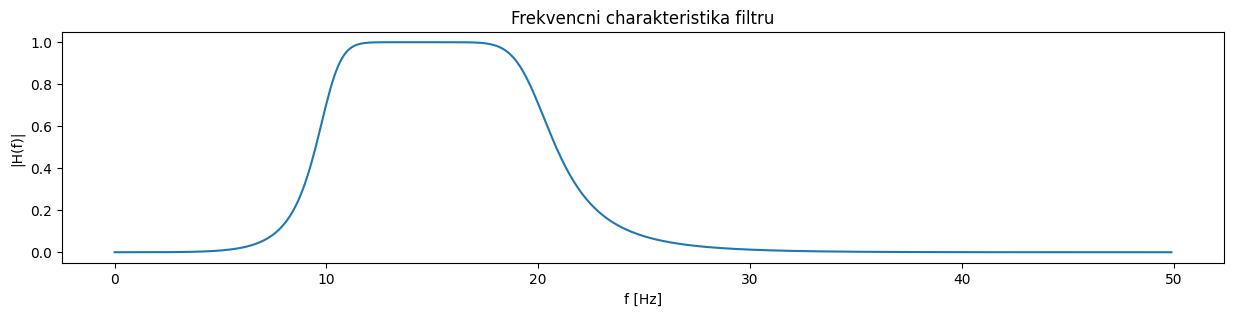

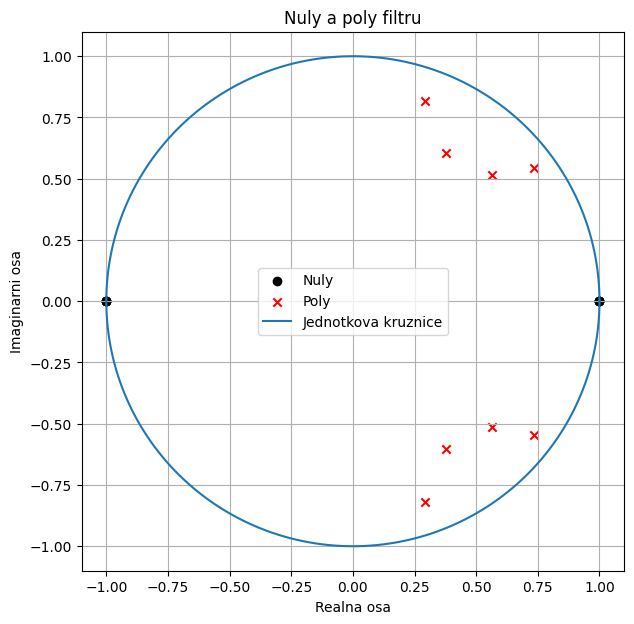

In [ ]:
low_f = 10
high_f = 20

b, a = signal.butter(4, [low_f, high_f], btype = "bandpass", fs = new_fs)
w, h = signal.freqz(b, a)

plt.figure(figsize = (15, 3))
plt.plot(new_fs * w / 2 / np.pi, np.abs(h))
plt.title("Frekvencni charakteristika filtru")
plt.xlabel("f [Hz]")
plt.ylabel("|H(f)|")
plt.show()


zeros, poles, gain = signal.tf2zpk(b, a)

plt.figure(figsize = (7, 7))
plt.scatter(np.real(zeros), np.imag(zeros), marker = "o", color = "black", label = "Nuly")
plt.scatter(np.real(poles), np.imag(poles), marker = "x", color = "red", label = "Poly")
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 500)), np.sin(np.linspace(0, 2 * np.pi, 500)), label = "Jednotkova kruznice")

plt.title("Nuly a poly filtru")
plt.xlabel("Realna osa")
plt.ylabel("Imaginarni osa")
plt.legend()
plt.grid()

plt.show()


  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


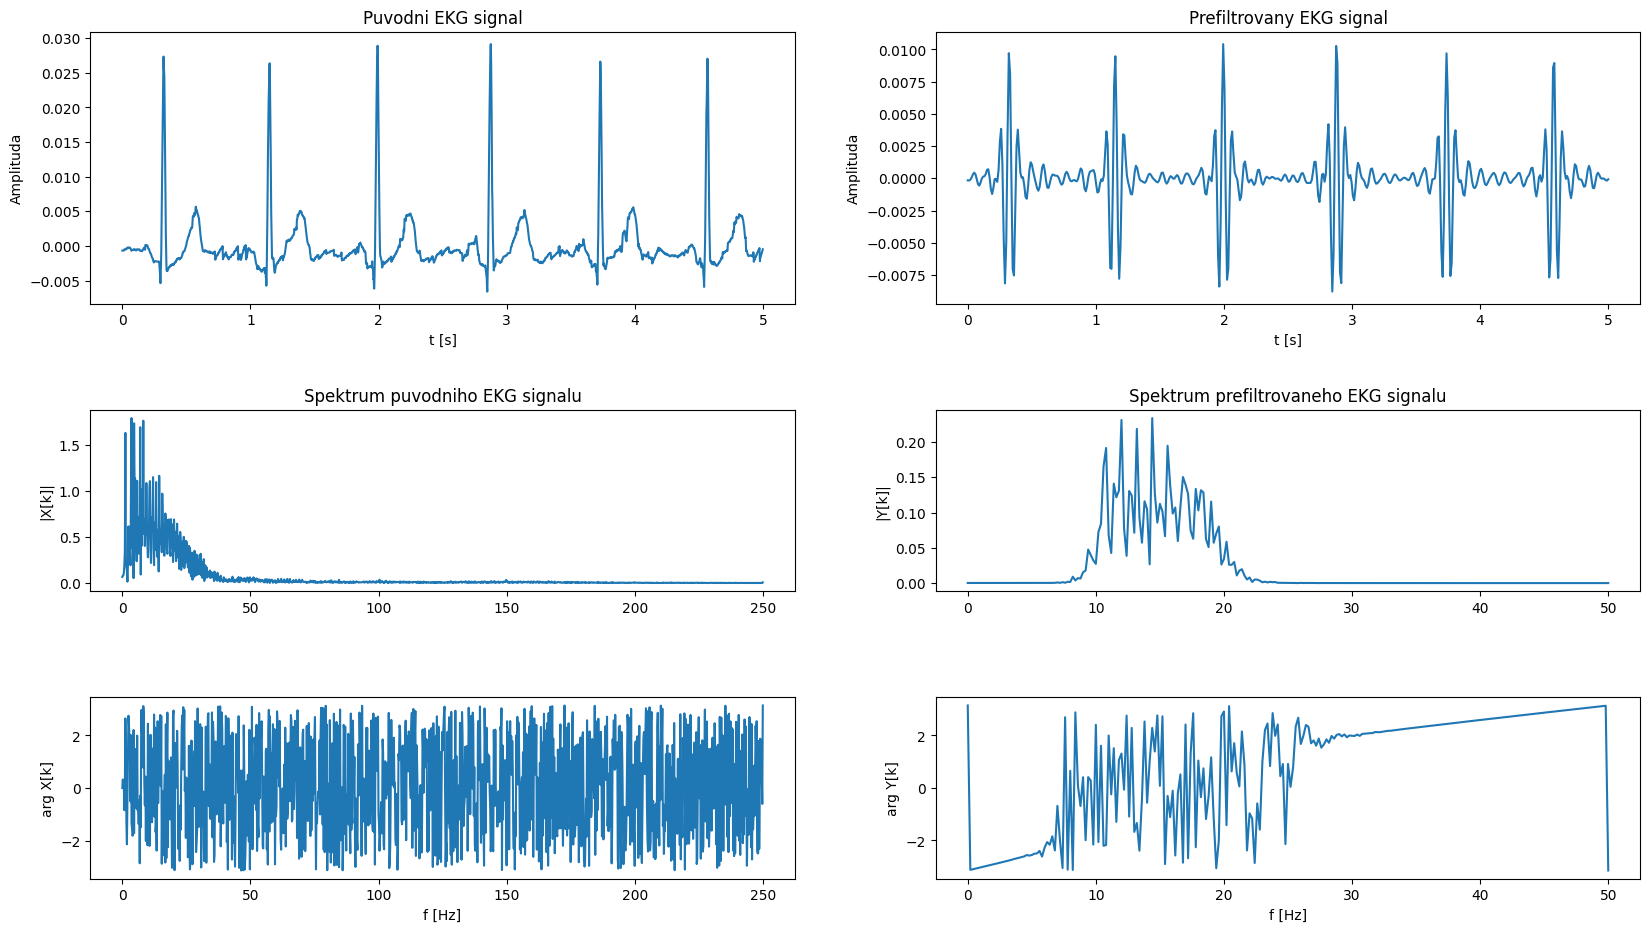

In [ ]:
filtered_signal = signal.filtfilt(b, a, new_signal)

_, ax3 = plt.subplots(3, 2, figsize = (20, 11), gridspec_kw={'height_ratios': [3, 2, 2]})
plt.subplots_adjust(hspace = 0.5)

ax3[0,0].plot(time, our_signal)
ax3[0,0].set_title("Puvodni EKG signal")
ax3[0,0].set_xlabel("t [s]")
ax3[0,0].set_ylabel("Amplituda")

ax3[0,1].plot(new_time, filtered_signal)
ax3[0,1].set_title("Prefiltrovany EKG signal")
ax3[0,1].set_xlabel("t [s]")
ax3[0,1].set_ylabel("Amplituda")

kall = np.arange(0, int(signal_size / 2) + 1)
Xmag = np.abs(X[kall])
Xphase = np.angle(X[kall])
frequency = kall / signal_size * fs

ax3[1,0].plot(frequency, Xmag)
ax3[1,0].set_title("Spektrum puvodniho EKG signalu")
ax3[1,0].set_ylabel("|X[k]|")
ax3[2,0].plot(frequency, Xphase)
ax3[2,0].set_xlabel("f [Hz]")
ax3[2,0].set_ylabel("arg X[k]")

filtered_signal_size = len(filtered_signal)
Y = np.fft.fft(filtered_signal)
kall_filtered = np.arange(0, int(filtered_signal_size / 2) + 1)
Ymag_filtered = np.abs(Y[kall_filtered])
Yphase_filtered = np.angle(Y[kall_filtered])
frequency_filtered = kall_filtered / filtered_signal_size * new_fs

ax3[1,1].plot(frequency_filtered, Ymag_filtered)
ax3[1,1].set_title("Spektrum prefiltrovaneho EKG signalu")
ax3[1,1].set_ylabel("|Y[k]|")
ax3[2,1].plot(frequency_filtered, Yphase_filtered)
ax3[2,1].set_xlabel("f [Hz]")
ax3[2,1].set_ylabel("arg Y[k]")

plt.show()


  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?



QRS komplex se nachází na frekvencích 10-20Hz, tudíž náš filtr tyto vlny zvýrazní, ale vlny, které se nachází na jiných frekvencích, utlumí. Pokud bychom použili filtr pouze zleva, propustil by i nízké frekvence, na kterých jsou například T a P vlny, které by poté nebyly utlumeny.
Jelikož filtr propustí převážně pouze frekvence od 10Hz do 20Hz, spektrum přefiltrovaného signálu se také převážně nachází na těchto frekvencích.

### 4.4. [3b] Vytvořte detektor QRS v časové doméně. Detekované QRS komplexy uložte do vhodné struktury a zároveň zobrazte graf v časové ose se zvýrazněnými QRS detekcemi.

   a) [1b] Detekujte QRS v převzorkovaném vyfiltrovaném signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

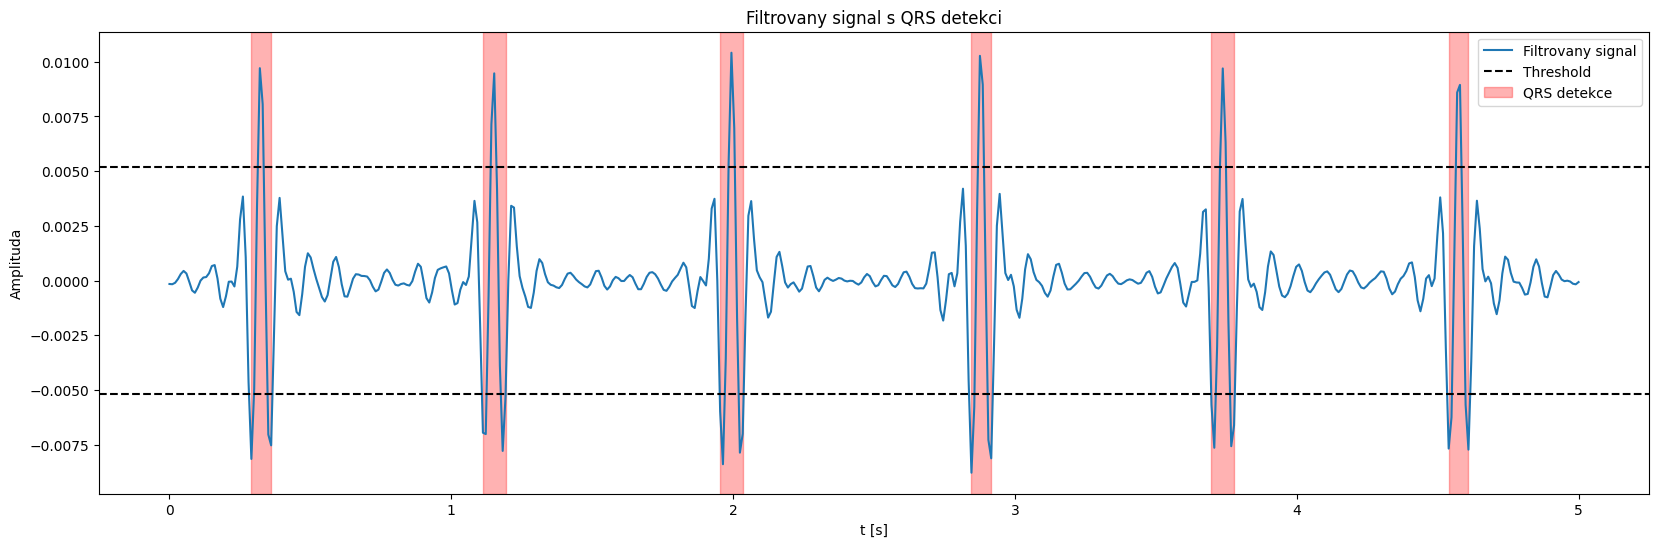

In [ ]:
maximal_amplitude = np.max(np.abs(filtered_signal))

threshold = maximal_amplitude * 0.5
threshold2 = -threshold

qrs = np.where((filtered_signal > threshold) | (filtered_signal < threshold2))[0]
qrs_in_time = new_time[qrs]

plt.figure(figsize=(20, 6))
plt.plot(new_time, filtered_signal, label = "Filtrovany signal")
plt.axhline(y = threshold, color = "black", linestyle = "--", label = "Threshold")
plt.axhline(y = threshold2, color = "black", linestyle = "--")

#plt.scatter(qrs_in_time, filtered_signal[qrs], color = "green", label = "QRS detekovano")
plt.axvspan(qrs_in_time[0], qrs_in_time[4], color = "red", alpha = 0.3, label = "QRS detekce")
plt.axvspan(qrs_in_time[5], qrs_in_time[10], color = "red", alpha = 0.3)
plt.axvspan(qrs_in_time[11], qrs_in_time[17], color = "red", alpha = 0.3)
plt.axvspan(qrs_in_time[18], qrs_in_time[23], color = "red", alpha = 0.3)
plt.axvspan(qrs_in_time[24], qrs_in_time[29], color = "red", alpha = 0.3)
plt.axvspan(qrs_in_time[30], qrs_in_time[35], color = "red", alpha = 0.3)


plt.title("Filtrovany signal s QRS detekci")
plt.xlabel("t [s]")
plt.ylabel("Amplituda")
plt.legend()
plt.show()


b) [2b] Detekujte QRS v signálu pomocí autokorelace v převzorkovaném nefiltrovaném signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

In [ ]:
# Zde napište váš kód

### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného převzorkovaného filtrovaného signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. Spektrogram dále normalizujte v čase. Spočítejte sumy energie spektra pro jednotlivé časové biny. Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

In [ ]:
# Zde napište váš kód

b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace.

Hilbertova transformace je spočítaná podle následujícího vzorce

$x_a = F^{-1}(F(x) 2U) = x + i y,$

kde F je Fourierova transformace a $F^{-1}$ je její zpětná varianta. $U$ je Heavisideova funkce neboli funkce jednotkového skoku, která je definována: $U(x):$

\begin{cases}
      0.5 & x=0 \\
      1 & 0<x<\frac{N}{2} \text{ pro  $N$  liché} \\
      0.5 & x=\frac{N}{2} \text{ pro  $N$  liché} \\
      1 & 0<x\le\frac{N}{2} \text{ pro  $N$  sudé} \\
      0 & jinak
\end{cases}

kde $N$ je počet koeficientů Fourierovy transformace - pokud není určeno jinak, je to počet vzorků signálu.

Jinými slovy obálku spočítate tak, že:

* Spočítáte FFT $F$ na filtrovaném a převzorkovaném signálu
* Vynulujete pravou symetrickou část spektra
* Levou část spektra vynasobíte 2 kromě prvního a prostředního binu (při sudém počtu frekvenčních binů).
* Provedete zpětnou FFT $F^{-1}$

Abyste získali obálku signálu, je třeba vzít absolutní hodnotu signálu získaného Hilbertovou transformací.

Obálku a signál vykreslete do jednoho grafu přes sebe, obálka by měla obalovat daný signál.

In [ ]:
# Zde napište váš kód

c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

*Zde napište vaše řešení.*

### 4.6 [2b] Detekce R-R intervalu

In [ ]:
# Zde napište váš kód

### 4.7 Bonus

a) Načtěte si signál obsahující fibrilaci FIS.wav. Proveďte na něm filtrace a převzorkování. Poté zkuste použít nějaký QRS detektor. Z detekovaných QRS detekujte R-R intervaly. Porovnejte R-R intervaly pro fibrilaci a klasický signál bez patologie (sinusovy rytmus). Měli byste vidět prudké změny v R-R intervalech a jejich nepravidelnost. Zároveň se vám může stát, že vám některé metody detekce QRS nepodají tak kvalitní výkon jako při sinusovém rytmu.

In [ ]:
# Zde napište váš kód

b) Načtěte si signál obsahující komorovou extrasystolu KES.wav. Proveďte na něm filtrace a převzorkování. Spočítejte a zobrazte spektrogram úseku tohoto signálu. Porovnejte spektrogramy vašeho signálu a signálu KES.wav. Měli byste vidět rozšířenou aktivitu na nízkých frekvencích. Dále zobrazte a porovnejte tyto signály v časové doméně. Obsažené komorové extrasystoly by se měly projevit jako zvláštní široké QRS.

In [ ]:
# Zde napište váš kód